# Clustering con data filtrada
En este jupyter se probarán modelos de clustering con la data filtrada tomando en cuenta solamente los datos de palas, con toneladas y tiempos efectivos distintos de cero, para asi clasificar segun el rendimiento.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
df = pd.read_excel('dataframe.xlsx', sheet_name='Hoja1')
df.head()

,ID,shiftdate,shiftindex,shift#,start,crew#,crew,eqmtid,logintime,locid,...,tmcat10,tmcat11,tmcat12,tmcat13,tmcat14,tmcat15,tmcat16,tmcat17,tmcat18,tmcat19
0,1,2019-07-01,36157,2,28800,4,G2,428,36957,,...,0,0,0,0,0,0,0,0,0,0
1,2,2019-07-01,36157,2,28800,4,G2,429,0,,...,0,0,0,0,0,0,0,0,0,0
2,3,2019-07-01,36157,2,28800,4,G2,429,3110,,...,0,0,0,0,0,0,0,0,0,0
3,4,2019-07-01,36157,2,28800,4,G2,430,0,,...,0,0,0,0,0,0,0,0,0,0
4,5,2019-07-01,36157,2,28800,4,G2,430,2776,,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.drop(columns=['tmcat00','tmcat08', 'tmcat09', 'tmcat10',
       'tmcat11', 'tmcat12', 'tmcat13', 'tmcat14', 'tmcat15', 'tmcat16',
       'tmcat17', 'tmcat18', 'tmcat19'],inplace=True)

In [4]:
df = df.rename(columns={'shiftdate':'Fecha_carga'})
df = df.rename(columns={'shiftindex':'indice_turno'})
df = df.rename(columns={'shift#':'turno'})
df = df.rename(columns={'start':'inicio_turno'})
df = df.rename(columns={'crew#':'id_grupo'})
df = df.rename(columns={'crew':'nom_grupo'})
df = df.rename(columns={'eqmtid':'id_equipo_operado'})
df = df.rename(columns={'logintime':'inicio_loginop'})
df = df.rename(columns={'locid':'lugar_operacion'})
df = df.rename(columns={'operid':'id_operador'})
df = df.rename(columns={'totaltime':'duracion_login'})
df = df.rename(columns={'pit':'area_mina'})
df = df.rename(columns={'unit#':'id_tipoeq'})
df = df.rename(columns={'unit':'glosa_tipoeq'})
df = df.rename(columns={'unit#':'id_tipoeq'})
df = df.rename(columns={'totalloads':'total_cargas'})
df = df.rename(columns={'totaltons':'total_tons'})
df = df.rename(columns={'loadtime':'ttotal_cargas'})
df = df.rename(columns={'idletime':'ttotal_espera'})
df = df.rename(columns={'spottime':'ttotal_aculatamiento'})
df = df.rename(columns={'loadcnt':'contador_cargas'})
#df = df.rename(columns={'tmcat00':''})
df = df.rename(columns={'tmcat01':'t_efectivo'})
df = df.rename(columns={'tmcat02':'t_noproductivo'})
df = df.rename(columns={'tmcat03':'t_demoraoperacional'})
df = df.rename(columns={'tmcat04':'t_reserva'})
df = df.rename(columns={'tmcat05':'t_mantencionNP'})
df = df.rename(columns={'tmcat06':'t_inhabil'})
df = df.rename(columns={'tmcat07':'t_mantencionP'})

In [5]:
df.head()

,ID,Fecha_carga,indice_turno,turno,inicio_turno,id_grupo,nom_grupo,id_equipo_operado,inicio_loginop,lugar_operacion,...,ttotal_espera,ttotal_aculatamiento,contador_cargas,t_efectivo,t_noproductivo,t_demoraoperacional,t_reserva,t_mantencionNP,t_inhabil,t_mantencionP
0,1,2019-07-01,36157,2,28800,4,G2,428,36957,,...,262,337,3,5784,0,459,0,0,0,0
1,2,2019-07-01,36157,2,28800,4,G2,429,0,,...,0,0,1,0,0,0,3110,0,0,0
2,3,2019-07-01,36157,2,28800,4,G2,429,3110,,...,1443,1334,19,29034,0,450,6264,0,4342,0
3,4,2019-07-01,36157,2,28800,4,G2,430,0,,...,0,0,0,8,0,0,2768,0,0,0
4,5,2019-07-01,36157,2,28800,4,G2,430,2776,,...,171,1744,19,30466,0,1042,4657,0,4259,0


In [6]:
df.indice_turno = df.indice_turno.astype(int)
df.inicio_turno = df.inicio_turno.astype(int)
df.id_grupo = df.id_grupo.astype(int)
df.inicio_loginop = df.inicio_loginop.astype(int)
df.duracion_login = df.duracion_login.astype(int)
df.total_cargas = df.total_cargas.astype(int)
df.ttotal_cargas = df.ttotal_cargas.astype(int)
df.ttotal_espera = df.ttotal_espera.astype(int)
df.ttotal_aculatamiento = df.ttotal_aculatamiento.astype(int)
df.contador_cargas = df.contador_cargas.astype(int)
df.t_efectivo = df.t_efectivo.astype(int)
df.t_noproductivo = df.t_noproductivo.astype(int)
df.t_demoraoperacional = df.t_demoraoperacional.astype(int)
df.t_reserva = df.t_reserva.astype(int)
df.t_mantencionNP = df.t_mantencionNP.astype(int)
df.t_inhabil = df.t_inhabil.astype(int)
df.t_mantencionP = df.t_mantencionP.astype(int)
df.total_tons = df.total_tons.astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120441 entries, 0 to 120440
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    120441 non-null  int64         
 1   Fecha_carga           120441 non-null  datetime64[ns]
 2   indice_turno          120441 non-null  int32         
 3   turno                 120441 non-null  int64         
 4   inicio_turno          120441 non-null  int32         
 5   id_grupo              120441 non-null  int32         
 6   nom_grupo             120441 non-null  object        
 7   id_equipo_operado     120441 non-null  object        
 8   inicio_loginop        120441 non-null  int32         
 9   lugar_operacion       120441 non-null  object        
 10  id_operador           120441 non-null  object        
 11  duracion_login        120441 non-null  int32         
 12  area_mina             120441 non-null  object        
 13 

Tomamos en cuenta solo aquellos valores distintos de cero en total_tons

In [9]:
#Filtro 1: camiones y palas
df_loads = df[(df.glosa_tipoeq == 'Pala')]

In [10]:
# Filtro 2: total tons y t efectivo >0
df_sinceros= df_loads[df_loads.total_tons!=0]
df_sinceros= df_loads[df_loads.t_efectivo!=0]

In [11]:
df_sinceros.describe()

,ID,indice_turno,turno,inicio_turno,id_grupo,inicio_loginop,duracion_login,id_tipoeq,total_cargas,total_tons,...,ttotal_espera,ttotal_aculatamiento,contador_cargas,t_efectivo,t_noproductivo,t_demoraoperacional,t_reserva,t_mantencionNP,t_inhabil,t_mantencionP
count,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.0,11303.000000,11303.000000,...,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000
mean,60005.347695,36567.354773,1.564010,10034.008670,2.416084,9700.342122,18421.932230,2.0,23.813147,5488.372733,...,6216.301601,1332.230027,23.813147,12339.722286,0.902592,1301.386623,1510.209325,266.463859,2918.506680,84.740865
std,36173.139989,267.218976,0.495908,21498.876949,1.122956,12373.527487,15590.991776,0.0,33.071438,7627.938888,...,9275.587772,1875.018278,33.071438,11707.031533,82.496018,2193.126176,4744.742925,1800.002219,7504.736058,1181.784328
min,46.000000,36156.000000,1.000000,-14400.000000,1.000000,0.000000,1.000000,2.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27638.500000,36327.000000,1.000000,-14400.000000,1.000000,464.000000,4588.500000,2.0,0.000000,0.000000,...,808.500000,0.000000,0.000000,2475.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59022.000000,36536.000000,2.000000,28800.000000,2.000000,1461.000000,13553.000000,2.0,10.000000,2331.000000,...,2351.000000,535.000000,10.000000,8187.000000,0.000000,563.000000,0.000000,0.000000,0.000000,0.000000
75%,93184.500000,36820.000000,2.000000,28800.000000,3.000000,20002.000000,33189.000000,2.0,33.000000,7678.000000,...,6344.000000,1939.500000,33.000000,19630.500000,0.000000,1800.000000,0.000000,3.000000,3586.000000,0.000000
max,120393.000000,37027.000000,2.000000,72000.000000,4.000000,43175.000000,43200.000000,2.0,232.000000,50616.000000,...,43200.000000,13801.000000,232.000000,43200.000000,8704.000000,41400.000000,43182.000000,42088.000000,43171.000000,38403.000000


In [12]:
#Filtro de palas
df_sinceros['glosa_tipoeq'].unique()

array(['Pala'], dtype=object)

In [13]:
#Rendimiento= (total_tons/t_efectivo) * (1000/3600)
df_sinceros['Rendimiento']=(df_sinceros['total_tons']/df_sinceros['t_efectivo'])*(1000/3600)

<ipython-input-13-5a481619c4b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinceros['Rendimiento']=(df_sinceros['total_tons']/df_sinceros['t_efectivo'])*(1000/3600)


In [14]:
df_sinceros['Rendimiento'].describe()

count    11303.000000
mean         0.135628
std          0.603687
min          0.000000
25%          0.000000
50%          0.128173
75%          0.190550
max         55.482456
Name: Rendimiento, dtype: float64

In [15]:
df_sinceros['Rendimiento'].mode()

0    0.0
dtype: float64

In [16]:
#Creación de etiquetas
df_sinceros['etiqueta']=df_sinceros['Rendimiento'].apply(lambda x : 1 if (x >= 1.1) else 0)

<ipython-input-16-f94cd99ecbf4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinceros['etiqueta']=df_sinceros['Rendimiento'].apply(lambda x : 1 if (x >= 1.1) else 0)


In [20]:
i = 0
for x in df_sinceros['etiqueta']: 
    if x == 0:
        i+=1

In [21]:
i

11276

In [54]:
df_sinceros.columns

Index(['ID', 'Fecha_carga', 'indice_turno', 'turno', 'inicio_turno',
       'id_grupo', 'nom_grupo', 'id_equipo_operado', 'inicio_loginop',
       'lugar_operacion', 'id_operador', 'duracion_login', 'area_mina',
       'id_tipoeq', 'glosa_tipoeq', 'total_cargas', 'total_tons',
       'ttotal_cargas', 'ttotal_espera', 'ttotal_aculatamiento',
       'contador_cargas', 't_efectivo', 't_noproductivo',
       't_demoraoperacional', 't_reserva', 't_mantencionNP', 't_inhabil',
       't_mantencionP', 'Rendimiento', 'etiqueta'],
      dtype='object')

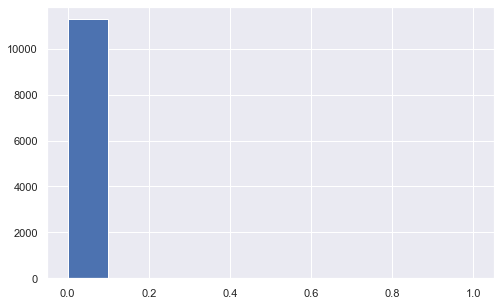

In [73]:
plt.figure(figsize=(8,5))
df_sinceros['etiqueta'].hist()
plt.show()

Despues de filtrar el dataset por palas y por toneladas totales y tiempos efectivos mayores a cero para poder calcular el rendimiento, nos percatamos de que hay una gran cantidad de rendimientos con un valor muy inferior a 3.1 de hecho gran parte de los rendimientos tiene valores entre 0 y 1. Debido a esto, al momento de clasificar en base al rendimiento (mayor a 3,1 = 1 y en caso contrario = 0) nos dio que un 99,88% de los datos clasificarian como 0 es decir menor a 3.1 Ktons/hora (valor entregado por CMP como parámetro a usar para clasificar)

Probamos bajando el 3.1 a 1.1 y esta situación mejoro infimamente ya que ahora los datos etiquetados como 0 serian 99,83%.

# KNN

The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms.
Es un algoritmo de aprendizaje perezoso ya que no tiene una fase de entrenamiento especializada. Más bien, usa todos los datos para entrenar mientras clasifica un nuevo punto de datos o instancia. KNN es un algoritmo de aprendizaje no paramétrico, lo que significa que no asume nada sobre los datos subyacentes. Esta es una característica extremadamente útil ya que la mayoría de los datos del mundo real realmente no siguen ninguna suposición teórica, p. separabilidad lineal, distribución uniforme, etc.

La intuición detrás del algoritmo KNN es uno de los más simples de todos los algoritmos de aprendizaje automático supervisados. Simplemente calcula la distancia de un nuevo punto de datos a todos los demás puntos de datos de entrenamiento. La distancia puede ser de cualquier tipo, por ejemplo, euclidiana o de Manhattan, etc. A continuación, selecciona los puntos de datos K más cercanos, donde K puede ser cualquier número entero. Finalmente, asigna el punto de datos a la clase a la que pertenecen la mayoría de los K puntos de datos.

In [22]:
y=df_sinceros['etiqueta']
y

45        0
138       0
139       0
141       0
142       0
         ..
120325    0
120326    0
120328    0
120389    0
120392    0
Name: etiqueta, Length: 11303, dtype: int64

In [24]:
X=df_sinceros[['total_tons',
       'ttotal_cargas', 'ttotal_espera', 'ttotal_aculatamiento',
       'contador_cargas', 't_efectivo', 't_noproductivo',
       't_demoraoperacional', 't_reserva', 't_mantencionNP', 't_inhabil',
       't_mantencionP']]
X.head()

,total_tons,ttotal_cargas,ttotal_espera,ttotal_aculatamiento,contador_cargas,t_efectivo,t_noproductivo,t_demoraoperacional,t_reserva,t_mantencionNP,t_inhabil,t_mantencionP
45,23335,22347,5090,7656,100,35320,0,2801,0,0,1772,0
138,0,0,34200,0,0,34200,0,1800,0,0,7200,0
139,0,0,27000,0,0,27000,0,9000,0,0,7200,0
141,14648,6950,3566,3135,64,13651,0,0,3086,0,0,0
142,21134,10344,5537,5636,93,21517,0,814,0,0,4132,0


In [25]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X

array([[ 2.33974302,  2.93337087, -0.12143181, ..., -0.14804184,
        -0.15277784, -0.07170904],
       [-0.7195411 , -0.79957085,  3.01705262, ..., -0.14804184,
         0.57053075, -0.07170904],
       [-0.7195411 , -0.79957085,  2.24078715, ..., -0.14804184,
         0.57053075, -0.07170904],
       ...,
       [-0.7195411 , -0.79957085, -0.26105178, ..., -0.14804184,
        -0.38890585, -0.07170904],
       [-0.43819446, -0.45295367, -0.52476641, ..., -0.14804184,
        -0.38890585, -0.07170904],
       [-0.7195411 , -0.79957085, -0.23582315, ..., -0.14804184,
        -0.38890585, -0.07170904]])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=101)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [28]:
pred = knn.predict(X_test)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print(confusion_matrix(y_test,pred))

[[3384    0]
 [   7    0]]


In [31]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3384
           1       0.00      0.00      0.00         7

    accuracy                           1.00      3391
   macro avg       0.50      0.50      0.50      3391
weighted avg       1.00      1.00      1.00      3391



C:\Users\Magdalena Albornoz\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Error Rate')

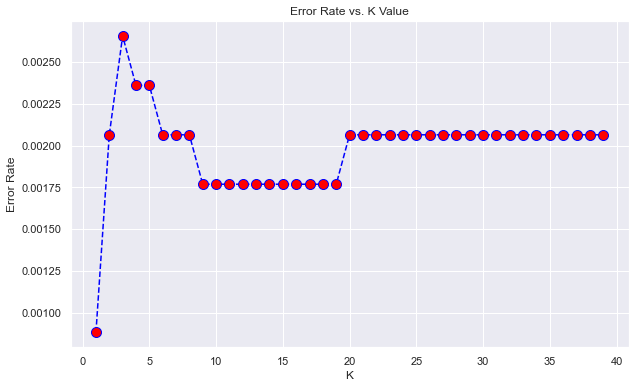

In [32]:
error_rate = []

# Se va a demorar un poco
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# K-means

K-means en Machine Learning: el agrupamiento K-means es uno de los algoritmos de aprendizaje automático no supervisados ​​más simples y populares.

Típicamente, los algoritmos no supervisados ​​hacen inferencias de conjuntos de datos usando solo vectores de entrada sin referirse a resultados conocidos o etiquetados.

El objetivo de K-means es simple: agrupar datos similares y descubrir patrones subyacentes. Para lograr este objetivo, K-means busca un número fijo ( k ) de clusters en un conjunto de datos.

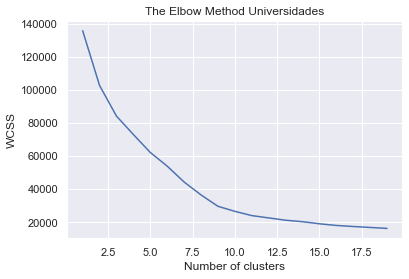

In [33]:
from sklearn.cluster import KMeans
#Donde WCSS es la suma de los cuadrados de las distancias y se 
#refiere a Within-Cluster-Sum-of-Squares, Yi es el centroide 
#del elemento o dato Xi y n el total de datos en la muestra.
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method Universidades')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2).fit(X)
km

KMeans(n_clusters=2)

In [35]:
centroids = km.cluster_centers_
print(centroids)

[[-0.42071297 -0.41176846 -0.02754536 -0.40487316 -0.4209143  -0.29738144
  -0.0101263  -0.0458016   0.03551925  0.01969097  0.01588117  0.01154361]
 [ 1.57648095  1.54296438  0.10321701  1.51712656  1.57723536  1.11433733
   0.03794493  0.17162614 -0.13309648 -0.0737853  -0.05950936 -0.04325579]]


In [36]:
km.labels_

array([1, 0, 0, ..., 0, 0, 0])

In [37]:
predicciones=km.predict(X)

In [38]:
X[:,4]

array([ 2.30380742, -0.72008361, -0.72008361, ..., -0.72008361,
       -0.41769451, -0.72008361])

In [39]:
X

array([[ 2.33974302,  2.93337087, -0.12143181, ..., -0.14804184,
        -0.15277784, -0.07170904],
       [-0.7195411 , -0.79957085,  3.01705262, ..., -0.14804184,
         0.57053075, -0.07170904],
       [-0.7195411 , -0.79957085,  2.24078715, ..., -0.14804184,
         0.57053075, -0.07170904],
       ...,
       [-0.7195411 , -0.79957085, -0.26105178, ..., -0.14804184,
        -0.38890585, -0.07170904],
       [-0.43819446, -0.45295367, -0.52476641, ..., -0.14804184,
        -0.38890585, -0.07170904],
       [-0.7195411 , -0.79957085, -0.23582315, ..., -0.14804184,
        -0.38890585, -0.07170904]])

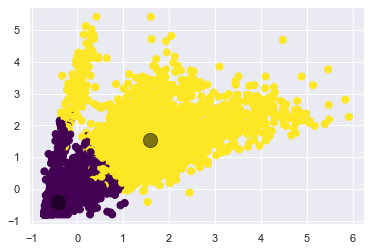

In [40]:
plt.scatter(X[:, 0], X[:, 1], c=predicciones, s=50, cmap='viridis')
#plt.scatter(X[:, 0], X[:, 1], c=predicciones, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5);

In [41]:
labels_true=y
labels_pred=predicciones

In [42]:
from sklearn.metrics.cluster import contingency_matrix
contingency_matrix(labels_true,labels_pred)

array([[8889, 2387],
       [  27,    0]])

In [43]:
from scipy.cluster.vq import vq

    # centroids: N-dimensional array with your centroids
    # points:    N-dimensional array with your data points

closest, distances = vq(centroids, X)

In [44]:
represent=df['indice_turno'].values
represent.shape
represent
for row in closest:
    print(represent[row])

36223
36184


In [45]:
print("Validación Modelo: K-means")
from sklearn import metrics
#Validación Modelo
#print('Estimated number of clusters: %d' % n_clusters)
#print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels_pred))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels_pred))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels_pred))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels_pred))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels_pred))
print("Fowlkes-Mallows: %0.3f" % metrics.fowlkes_mallows_score(labels_true,labels_pred))
print("Calinski-Harabasz Index: %0.3f" % metrics.calinski_harabasz_score(X,labels_pred))

Validación Modelo: K-means
Homogeneity: 0.034
Completeness: 0.001
V-measure: 0.002
Adjusted Rand Index: -0.003
Silhouette Coefficient: 0.398
Fowlkes-Mallows: 0.814
Calinski-Harabasz Index: 3645.484


# Hierarchical Clustering

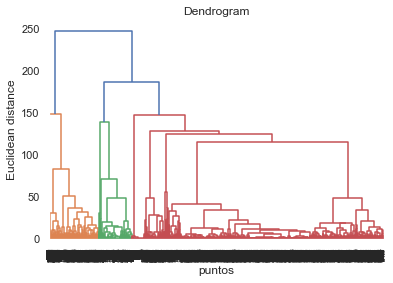

In [46]:
#Hierarchical clustering
import scipy.cluster.hierarchy as sch
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('puntos')
plt.ylabel('Euclidean distance')
plt.show()

In [47]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

clustering = AgglomerativeClustering().fit(X)
clustering

AgglomerativeClustering()

In [48]:
prediccion_hc = clustering.labels_
prediccion_hc

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)